<a href="https://colab.research.google.com/github/valentingracia/codingDojoDC/blob/main/Silueta_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
#libraries
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#modelo
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [294]:
#dataset
my_df=pd.read_csv("/content/drive/MyDrive/Coding Dojo/noSupervisado/cust_seg.csv",index_col="Customer Id")

In [295]:
my_df.drop(columns=["Unnamed: 0"],inplace=True)

In [296]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [297]:
#missing values
my_df["Defaulted"].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [298]:
#Drop missings
#Not best solutions
my_df.dropna(inplace=True)


In [299]:
#Escalamos Dataset
scaler=StandardScaler()

#En no supervisado podemos hacer los dos pasos, si miedo del leakage
scaled_df=scaler.fit_transform(my_df)


In [300]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [301]:
#nueva columna de clusters
my_df["cluster"]=kmeans.labels_

In [302]:
my_df.head(4)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,3
2,47,1,26,100,4.582,8.218,0.0,12.8,2
3,33,2,10,57,6.111,5.802,1.0,20.9,4
4,29,2,4,19,0.681,0.516,0.0,6.3,3


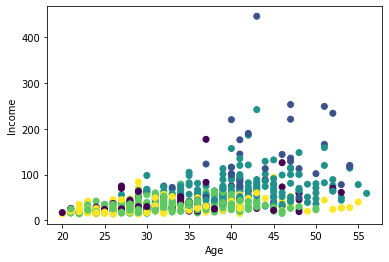

In [303]:
#visualizacion

plt.scatter(my_df['Age'],my_df['Income'],c=my_df["cluster"])
plt.xlabel("Age")
plt.ylabel("Income");

In [304]:
my_df.cluster.value_counts()

3    281
2    154
4    149
0     79
1     37
Name: cluster, dtype: int64

In [305]:
seg1=my_df[my_df["cluster"]==0]
seg2=my_df[my_df["cluster"]==1]
seg3=my_df[my_df["cluster"]==2]
seg4=my_df[my_df["cluster"]==3]
seg5=my_df[my_df["cluster"]==4]

In [306]:
cust_segs=[seg1,seg2,seg3,seg4,seg5]

for seg in cust_segs:
  print(seg.describe().T)


                 count       mean        std  ...     50%      75%      max
Age               79.0  33.531646   7.623909  ...  34.000  37.5000   53.000
Edu               79.0   3.481013   0.596158  ...   3.000   4.0000    5.000
Years Employed    79.0   4.873418   4.453080  ...   4.000   8.5000   15.000
Income            79.0  41.493671  24.688767  ...  34.000  47.0000  177.000
Card Debt         79.0   0.949418   0.839498  ...   0.722   1.4220    4.936
Other Debt        79.0   2.398633   1.920132  ...   1.756   3.3725    9.555
Defaulted         79.0   0.177215   0.384291  ...   0.000   0.0000    1.000
DebtIncomeRatio   79.0   8.569620   5.417075  ...   7.700  11.3000   24.600
cluster           79.0   0.000000   0.000000  ...   0.000   0.0000    0.000

[9 rows x 8 columns]
                 count        mean        std  ...      50%      75%      max
Age               37.0   43.216216   6.187510  ...   41.000   47.000   54.000
Edu               37.0    2.297297   1.127063  ...    2.000   

In [307]:
#algunos promedios
age_means = [np.mean(seg["Age"]) for seg in cust_segs]
income_means = [np.mean(seg["Income"]) for seg in cust_segs]
cardDebt_means = [np.mean(seg["Card Debt"]) for seg in cust_segs]


In [308]:
#dataframe salida

summary_df=pd.DataFrame({"cust_segs":["seg1","seg2","seg3","seg4","seg5"],"Age Means":age_means,"Income Means":income_means,"Card Debt":cardDebt_means})
summary_df

,cust_segs,Age Means,Income Means,Card Debt
0,seg1,33.531646,41.493671,0.949418
1,seg2,43.216216,128.378378,7.368216
2,seg3,41.584416,71.337662,2.022571
3,seg4,32.170819,29.903915,0.657199
4,seg5,31.610738,30.228188,1.635698


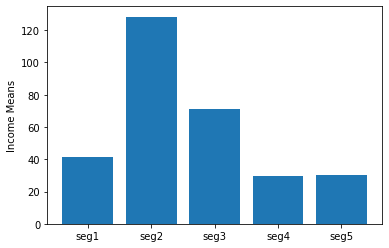

In [309]:
plt.bar(summary_df["cust_segs"],summary_df["Income Means"])
plt.ylabel("Income Means");

In [310]:
n_cluster=range(2,11)


0.20229606626915556

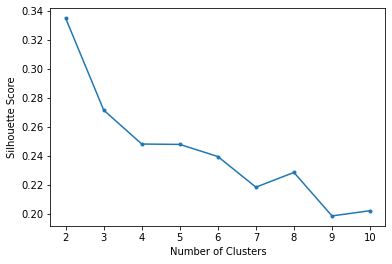

In [311]:
# Visualiza diferentes puntuaciones de silueta
# Guardar las puntuaciones de silueta para varios números de clúster en la lista
silhouette_scores = []
for i in n_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
silhouette_score(scaled_df, kmeans.labels_)

In [312]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.33496643365707623

0.1773632738821424

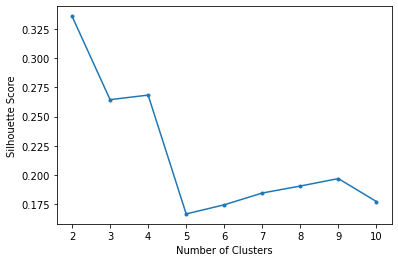

In [313]:
# Visualiza diferentes puntuaciones de silueta
# Guardar las puntuaciones de silueta para varios números de clúster en la lista


silhouette_scores = []
for i in n_cluster:
  aggClust = AgglomerativeClustering(n_clusters = i)
  aggClust.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, aggClust.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
silhouette_score(scaled_df, aggClust.labels_)

In [314]:
aggClust = AgglomerativeClustering(n_clusters = 2)
aggClust.fit(scaled_df)
silhouette_score(scaled_df, aggClust.labels_)

0.3357297821671033

0.6205511154449708

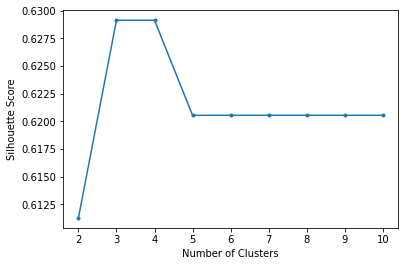

In [318]:
# Visualiza diferentes puntuaciones de silueta
# Guardar las puntuaciones de silueta para varios números de clúster en la lista

silhouette_scores = []
for i in n_cluster:
  dbScan = DBSCAN(eps=3, min_samples=i)
  dbScan.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, dbScan.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
silhouette_score(scaled_df, dbScan.labels_)

In [324]:
dbScan = DBSCAN(eps =7, min_samples = 3)                
dbScan.fit(scaled_df)
silhouette_score(scaled_df, dbScan.labels_)

0.734494641708757

el mejor modelo es el DBSCAN, con epsilon 7, estara bien mover tanto el epsilon?